In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import math
import copy
import numpy as np

from keras.models import Sequential, Model
from keras.layers import Input, Dense, Flatten, Dropout, Activation, Lambda, Permute, Reshape
from keras.layers import Convolution2D, ZeroPadding2D, MaxPooling2D
from keras_vggface.vggface import VGGFace
from keras_vggface import utils
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob
import pandas as pd
import cv2
import scipy.misc
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
from random_eraser import get_random_eraser

Augmented data

In [3]:
base_path = "C:/Users/saidh/Downloads/archive/real_vs_fake/real-vs-fake/"


batch_size=64

image_gen1 =  ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        preprocessing_function=get_random_eraser(v_l=0, v_h=1, pixel_level=False))

train_flow= image_gen1.flow_from_directory(
    base_path + 'train/',
    target_size = (224, 224),
    batch_size = batch_size,
    class_mode ='binary'
)

valid_flow = image_gen1.flow_from_directory(
    base_path + 'valid/',
    target_size = (224, 224),
    batch_size = batch_size,
    class_mode = 'binary'
)
test_flow = image_gen1.flow_from_directory(
    base_path + 'test/',
    target_size = (224, 224),
    batch_size = 1,
    shuffle = False,
    class_mode ='binary'
)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [4]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.layers import BatchNormalization
# """
#     Propsoed CNN architecture.
    
# """

# model = Sequential()

# # Pamameters Initialization
# input_shape = (224,224,3)
# activation = 'relu'
# padding = 'same'
# droprate = 0.1
# epsilon = 0.001

# model = Sequential()
# model.add(BatchNormalization(input_shape=input_shape))
# model.add(Conv2D(filters=16, kernel_size=3, activation=activation, padding=padding))
# model.add(MaxPooling2D(pool_size=2))
# model.add(BatchNormalization(epsilon=epsilon))


# model.add(Conv2D(filters=32, kernel_size=3, activation=activation, padding=padding))
# model.add(MaxPooling2D(pool_size=2))
# model.add(BatchNormalization(epsilon=epsilon))
# model.add(Dropout(droprate))

# model.add(Conv2D(filters=64, kernel_size=3, activation=activation, padding=padding))
# model.add(MaxPooling2D(pool_size=2))
# model.add(BatchNormalization(epsilon=epsilon))
# model.add(Dropout(droprate))

# model.add(Conv2D(filters =128, kernel_size=3, activation=activation, padding=padding))
# model.add(MaxPooling2D(pool_size=2))
# model.add(BatchNormalization(epsilon=epsilon))
# model.add(Dropout(droprate))

# model.add(Conv2D(filters=256, kernel_size=3, activation=activation, padding=padding))
# model.add(MaxPooling2D(pool_size=2))
# model.add(BatchNormalization(epsilon=epsilon))
# model.add(Dropout(droprate))

# model.add(Conv2D(filters=512, kernel_size=3, activation=activation, padding=padding))
# model.add(MaxPooling2D(pool_size=2))
# model.add(BatchNormalization(epsilon=epsilon))
# #model.add(Dropout(droprate))

# model.add(GlobalAveragePooling2D())
# #model.add(Flatten())
# #model.add(Dense(256, kernel_initializer='glorot_normal', activation='relu'))
# #model.add(Dropout(0.5))
          
# #model.add(Dense(128, kernel_initializer='glorot_normal', activation='relu'))
# #model.add(Dropout(0.5))
# #model.add(Dropout(droprate))
# model.add(Dense(1, activation='sigmoid'))

# model.summary() # Summary of the architecture

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 16)      64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 56, 56, 32)       

In [5]:
# input_shape = (224,224,3)
# epsilon=0.001
# activation = 'relu'
# padding = 'same'
# droprate = 0.1


# model = Sequential()
# model.add(BatchNormalization(input_shape=input_shape))
# model.add(Conv2D(filters=16, kernel_size=3, activation= 'relu', padding='same'))
# model.add(MaxPooling2D(pool_size=2))
# model.add(BatchNormalization())

# model.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
# model.add(MaxPooling2D(pool_size=2))
# model.add(BatchNormalization())
# # model.add(Dropout(0.1))

# model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
# model.add(MaxPooling2D(pool_size=2))
# model.add(BatchNormalization())
# model.add(Dropout(0.1))

# model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
# model.add(MaxPooling2D(pool_size=2))
# model.add(BatchNormalization())
# model.add(Dropout(0.1))

# model.add(Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'))
# model.add(MaxPooling2D(pool_size=2))
# model.add(BatchNormalization())
# model.add(Dropout(0.1))

# model.add(Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'))
# model.add(MaxPooling2D(pool_size=2))
# model.add(BatchNormalization())
# model.add(Dropout(0.1))

# model.add(Conv2D(filters=1024, kernel_size=3, activation='relu', padding='same'))
# model.add(MaxPooling2D(pool_size=2))
# model.add(BatchNormalization())
# model.add(Dropout(0.1))

# model.add(Flatten())

# model.add(Dense(1, activation='sigmoid'))

# model.summary()

In [1]:
import tensorflow as tf
from typing import List, Tuple
from keras.models import Model
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.initializers import glorot_uniform

In [2]:
def identity_block(X: tf.Tensor, level: int, block: int, filters: List[int]) -> tf.Tensor:
    """
    Creates an identity block (see figure 3.1 from readme)

    Input:
        X - input tensor of shape (m, height_prev, width_prev, chan_prev)
        level - integer, one of the 5 levels that our networks is conceptually divided into (see figure 3.1 in the readme file)
              - level names have the form: conv2_x, conv3_x ... conv5_x
        block - each conceptual level has multiple blocks (1 identity and several convolutional blocks)
                block is the number of this block within its conceptual layer
                i.e. first block from level 2 will be named conv2_1
        filters - a list on integers, each of them defining the number of filters in each convolutional layer

    Output:
        X - tensor (m, height, width, chan)
    """

    # layers will be called conv{level}_iden{block}_{convlayer_number_within_block}'
    conv_name = f'conv{level}_{block}' + '_{layer}_{type}'

    # unpack number of filters to be used for each conv layer
    f1, f2, f3 = filters

    # the shortcut branch of the identity block
    # takes the value of the block input
    X_shortcut = X

    # first convolutional layer (plus batch norm & relu activation, of course)
    X = Conv2D(filters=f1, kernel_size=(1, 1), strides=(1, 1),
               padding='valid', name=conv_name.format(layer=1, type='conv'),
               kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=conv_name.format(layer=1, type='bn'))(X)
    X = Activation('relu', name=conv_name.format(layer=1, type='relu'))(X)

    # second convolutional layer
    X = Conv2D(filters=f2, kernel_size=(3, 3), strides=(1, 1),
               padding='same', name=conv_name.format(layer=2, type='conv'),
               kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=conv_name.format(layer=2, type='bn'))(X)
    X = Activation('relu')(X)

    # third convolutional layer
    X = Conv2D(filters=f3, kernel_size=(1, 1), strides=(1, 1),
               padding='valid', name=conv_name.format(layer=3, type='conv'),
               kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=conv_name.format(layer=3, type='bn'))(X)

    # add shortcut branch to main path
    X = Add()([X, X_shortcut])

    # relu activation at the end of the block
    X = Activation('relu', name=conv_name.format(layer=3, type='relu'))(X)

    return X

In [3]:
def convolutional_block(X: tf.Tensor, level: int, block: int, filters: List[int], s: Tuple[int,int,int]=(2, 2)) -> tf.Tensor:
    """
    Creates a convolutional block (see figure 3.1 from readme)

    Input:
        X - input tensor of shape (m, height_prev, width_prev, chan_prev)
        level - integer, one of the 5 levels that our networks is conceptually divided into (see figure 3.1 in the readme file)
              - level names have the form: conv2_x, conv3_x ... conv5_x
        block - each conceptual level has multiple blocks (1 identity and several convolutional blocks)
                block is the number of this block within its conceptual layer
                i.e. first block from level 2 will be named conv2_1
        filters - a list on integers, each of them defining the number of filters in each convolutional layer
        s   - stride of the first layer;
            - a conv layer with a filter that has a stride of 2 will reduce the width and height of its input by half

    Output:
        X - tensor (m, height, width, chan)
    """

    # layers will be called conv{level}_{block}_{convlayer_number_within_block}'
    conv_name = f'conv{level}_{block}' + '_{layer}_{type}'

    # unpack number of filters to be used for each conv layer
    f1, f2, f3 = filters

    # the shortcut branch of the convolutional block
    X_shortcut = X

    # first convolutional layer
    X = Conv2D(filters=f1, kernel_size=(1, 1), strides=s, padding='valid',
               name=conv_name.format(layer=1, type='conv'),
               kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=conv_name.format(layer=1, type='bn'))(X)
    X = Activation('relu', name=conv_name.format(layer=1, type='relu'))(X)

    # second convolutional layer
    X = Conv2D(filters=f2, kernel_size=(3, 3), strides=(1, 1), padding='same',
               name=conv_name.format(layer=2, type='conv'),
               kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=conv_name.format(layer=2, type='bn'))(X)
    X = Activation('relu', name=conv_name.format(layer=2, type='relu'))(X)

    # third convolutional layer
    X = Conv2D(filters=f3, kernel_size=(1, 1), strides=(1, 1), padding='valid',
               name=conv_name.format(layer=3, type='conv'),
               kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=conv_name.format(layer=3, type='bn'))(X)

    # shortcut path
    X_shortcut = Conv2D(filters=f3, kernel_size=(1, 1), strides=s, padding='valid',
                        name=conv_name.format(layer='short', type='conv'),
                        kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=conv_name.format(layer='short', type='bn'))(X_shortcut)

    # add shortcut branch to main path
    X = Add()([X, X_shortcut])

    # nonlinearity
    X = Activation('relu', name=conv_name.format(layer=3, type='relu'))(X)

    return X

In [4]:
def ResNet50(input_size: Tuple[int,int,int], classes: int) -> Model:
    """
        Builds the ResNet50 model (see figure 4.2 from readme)

        Input:
            - input_size - a (height, width, chan) tuple, the shape of the input images
            - classes - number of classes the model must learn

        Output:
            model - a Keras Model() instance
    """

    # tensor placeholder for the model's input
    X_input = Input(input_size)

    ### Level 1 ###

    # padding
    X = ZeroPadding2D((3, 3))(X_input)

    # convolutional layer, followed by batch normalization and relu activation
    X = Conv2D(filters=64, kernel_size=(7, 7), strides=(2, 2),
               name='conv1_1_1_conv',
               kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='conv1_1_1_nb')(X)
    X = Activation('relu')(X)

    ### Level 2 ###

    # max pooling layer to halve the size coming from the previous layer
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # 1x convolutional block
    X = convolutional_block(X, level=2, block=1, filters=[64, 64, 256], s=(1, 1))

    # 2x identity blocks
    X = identity_block(X, level=2, block=2, filters=[64, 64, 256])
    X = identity_block(X, level=2, block=3, filters=[64, 64, 256])

    ### Level 3 ###

    # 1x convolutional block
    X = convolutional_block(X, level=3, block=1, filters=[128, 128, 512], s=(2, 2))

    # 3x identity blocks
    X = identity_block(X, level=3, block=2, filters=[128, 128, 512])
    X = identity_block(X, level=3, block=3, filters=[128, 128, 512])
    X = identity_block(X, level=3, block=4, filters=[128, 128, 512])

    ### Level 4 ###
    # 1x convolutional block
    X = convolutional_block(X, level=4, block=1, filters=[256, 256, 1024], s=(2, 2))
    # 5x identity blocks
    X = identity_block(X, level=4, block=2, filters=[256, 256, 1024])
    X = identity_block(X, level=4, block=3, filters=[256, 256, 1024])
    X = identity_block(X, level=4, block=4, filters=[256, 256, 1024])
    X = identity_block(X, level=4, block=5, filters=[256, 256, 1024])
    X = identity_block(X, level=4, block=6, filters=[256, 256, 1024])

    ### Level 5 ###
    # 1x convolutional block
    X = convolutional_block(X, level=5, block=1, filters=[512, 512, 2048], s=(2, 2))
    # 2x identity blocks
    X = identity_block(X, level=5, block=2, filters=[512, 512, 2048])
    X = identity_block(X, level=5, block=3, filters=[512, 512, 2048])

    # Pooling layers
    X = AveragePooling2D(pool_size=(2, 2), name='avg_pool')(X)

    # Output layer
    X = Flatten()(X)
    X = Dense(1, activation='softmax', name='fc_' + str(classes),
              kernel_initializer=glorot_uniform(seed=0))(X)

    # Create model
    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model

In [5]:
model = ResNet50(input_size = (224, 224, 3), classes =2)
model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_1_1_conv (Conv2D)         (None, 112, 112, 64) 9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1_1_1_nb (BatchNormalizatio (None, 112, 112, 64) 256         conv1_1_1_conv[0][0]             
___________________________________________________________________________________________

In [6]:
import tensorflow

In [7]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
opt = Adam(lr=0.0001)
model.compile(loss='binary_crossentropy',optimizer= opt, metrics=['accuracy'])

C:\Users\saidh\anaconda3\envs\tensorflow\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [8]:
from keras.callbacks import ModelCheckpoint
filepath = "saved-final-model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [10]:
train_steps = 100000//100
valid_steps = 20000//100

history = model.fit_generator(
    train_flow,
    epochs =100,
    callbacks= callbacks_list,
    steps_per_epoch = train_steps,
    validation_data = valid_flow,
    validation_steps = valid_steps
)

Epoch 1/100
1000/1000 [==============================] - 672s 672ms/step - loss: 0.5401 - accuracy: 0.7254 - val_loss: 0.5423 - val_accuracy: 0.7252

Epoch 00001: val_accuracy improved from 0.67172 to 0.72516, saving model to saved-final-model.h5
Epoch 2/100
1000/1000 [==============================] - 658s 658ms/step - loss: 0.4992 - accuracy: 0.7547 - val_loss: 0.4942 - val_accuracy: 0.7571

Epoch 00002: val_accuracy improved from 0.72516 to 0.75711, saving model to saved-final-model.h5
Epoch 3/100
1000/1000 [==============================] - 642s 642ms/step - loss: 0.4666 - accuracy: 0.7759 - val_loss: 0.5066 - val_accuracy: 0.7532

Epoch 00003: val_accuracy did not improve from 0.75711
Epoch 4/100
1000/1000 [==============================] - 635s 635ms/step - loss: 0.4390 - accuracy: 0.7946 - val_loss: 0.5642 - val_accuracy: 0.7302

Epoch 00004: val_accuracy did not improve from 0.75711
Epoch 5/100
1000/1000 [==============================] - 633s 633ms/step - loss: 0.4092 - accura

1000/1000 [==============================] - 633s 633ms/step - loss: 0.1367 - accuracy: 0.9444 - val_loss: 0.1908 - val_accuracy: 0.9237

Epoch 00038: val_accuracy did not improve from 0.94102
Epoch 39/100
1000/1000 [==============================] - 635s 635ms/step - loss: 0.1293 - accuracy: 0.9472 - val_loss: 0.1462 - val_accuracy: 0.9422

Epoch 00039: val_accuracy improved from 0.94102 to 0.94219, saving model to saved-final-model.h5
Epoch 40/100
1000/1000 [==============================] - 631s 631ms/step - loss: 0.1281 - accuracy: 0.9471 - val_loss: 0.2200 - val_accuracy: 0.9103

Epoch 00040: val_accuracy did not improve from 0.94219
Epoch 41/100
1000/1000 [==============================] - 633s 633ms/step - loss: 0.1220 - accuracy: 0.9520 - val_loss: 0.1958 - val_accuracy: 0.9248

Epoch 00041: val_accuracy did not improve from 0.94219
Epoch 42/100
1000/1000 [==============================] - 634s 634ms/step - loss: 0.1234 - accuracy: 0.9496 - val_loss: 0.1522 - val_accuracy: 0.93


Epoch 00076: val_accuracy did not improve from 0.97344
Epoch 77/100
1000/1000 [==============================] - 745s 745ms/step - loss: 0.0743 - accuracy: 0.9713 - val_loss: 0.1796 - val_accuracy: 0.9317

Epoch 00077: val_accuracy did not improve from 0.97344
Epoch 78/100
1000/1000 [==============================] - 762s 762ms/step - loss: 0.0738 - accuracy: 0.9701 - val_loss: 0.1407 - val_accuracy: 0.9441

Epoch 00078: val_accuracy did not improve from 0.97344
Epoch 79/100
1000/1000 [==============================] - 873s 873ms/step - loss: 0.0711 - accuracy: 0.9723 - val_loss: 0.1253 - val_accuracy: 0.9514

Epoch 00079: val_accuracy did not improve from 0.97344
Epoch 80/100
1000/1000 [==============================] - 748s 748ms/step - loss: 0.0734 - accuracy: 0.9710 - val_loss: 0.0778 - val_accuracy: 0.9698

Epoch 00080: val_accuracy did not improve from 0.97344
Epoch 81/100
1000/1000 [==============================] - 836s 836ms/step - loss: 0.0739 - accuracy: 0.9712 - val_loss: 

# ---------------------------------------------------------------------------------------------------------------

In [10]:
# # Parameters Initialization
# from tensorflow.keras.optimizers import SGD,Adam,Adadelta
# import keras
# #opt = rmsprop(lr=0.0001, decay=1e-6)

# model.compile(loss='binary_crossentropy',optimizer=Adam(0.0001), metrics=['accuracy'])

In [12]:
# from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
# import os

In [13]:
# save_dir = os.path.join(os.getcwd(), 'saved_models')
# model_name = 'cifar10_resnet_model.h5'
# if not os.path.isdir(save_dir):
#     os.makedirs(save_dir)
# filepath = os.path.join(save_dir, model_name)

In [14]:
# checkpoint = ModelCheckpoint(filepath=filepath,
#                              verbose=1,
#                              save_best_only=True)
# lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
#                                cooldown=0,
#                                patience=5,
#                                min_lr=0.5e-6)
# callbacks = [checkpoint, lr_reducer]

In [16]:
# data_augmentation = True
# random_erasing = True
# pixel_level = False

In [27]:
# if not data_augmentation:
#     print('Not using data augmentation.')
#     model.fit(x_train, y_train,
#               batch_size=batch_size,
#               epochs=epochs,
#               validation_data=(x_test, y_test),
#               shuffle=True,
#               callbacks=callbacks)
# else:
#     print('Using real-time data augmentation.')
#     # This will do preprocessing and realtime data augmentation:
#     datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
#         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#         horizontal_flip=True,  # randomly flip images
#         vertical_flip=False,  # randomly flip images
#         preprocessing_function=get_random_eraser(v_l=0, v_h=1, pixel_level=pixel_level))
#     datagen.fit(train_flow)

#     # Fit the model on the batches generated by datagen.flow().
#     model.fit_generator(datagen.flow(train_flow, y_train, batch_size=batch_size),
#                         steps_per_epoch=x_train.shape[0] // batch_size,
#                         validation_data=(x_test, y_test),
#                         epochs=epochs, verbose=1, workers=4,
#                         callbacks=callbacks)

In [11]:
# train_steps = 40000//batch_size
# valid_steps = 5000//batch_size
# history = model.fit_generator(
#     train_flow,
#     epochs=10,
#     steps_per_epoch=train_steps,
#     validation_data=valid_flow,
#     validation_steps=valid_steps
# )

C:\Users\saidh\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
625/625 [==============================] - 2093s 3s/step - loss: 0.7270 - accuracy: 0.6190 - val_loss: 0.6808 - val_accuracy: 0.6266
Epoch 2/10
625/625 [==============================] - 2002s 3s/step - loss: 0.6299 - accuracy: 0.6658 - val_loss: 0.6858 - val_accuracy: 0.6356
Epoch 3/10
625/625 [==============================] - 1998s 3s/step - loss: 0.5940 - accuracy: 0.6918 - val_loss: 0.6417 - val_accuracy: 0.6585
Epoch 4/10
625/625 [==============================] - 1864s 3s/step - loss: 0.5706 - accuracy: 0.7095 - val_loss: 0.5952 - val_accuracy: 0.6977
Epoch 5/10
625/625 [==============================] - 2019s 3s/step - loss: 0.5450 - accuracy: 0.7268 - val_loss: 0.5832 - val_accuracy: 0.7057
Epoch 6/10
625/625 [==============================] - 1971s 3s/step - loss: 0.5154 - accuracy: 0.7454 - val_loss: 0.6104 - val_accuracy: 0.6993
Epoch 7/10
625/625 [==============================] - 1936s 3s/step - loss: 0.5025 - accuracy: 0.7556 - val_loss: 0.5069 - val_accuracy:

In [11]:
model.save("custom_augmented_model.h5")

In [21]:
"""
Plot the training and validation loss
epochs - list of epoch numbers
loss - training loss for each epoch
val_loss - validation loss for each epoch
"""
def plot_loss(epochs, loss, val_loss):
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'orange', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()
"""
Plot the training and validation accuracy
epochs - list of epoch numbers
acc - training accuracy for each epoch
val_acc - validation accuracy for each epoch
"""
def plot_accuracy(epochs, acc, val_acc):
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'orange', label = 'Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

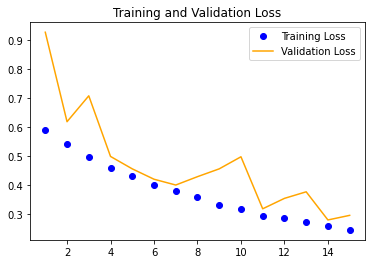

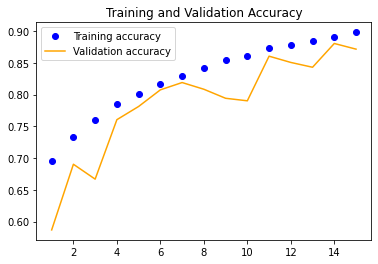

In [23]:
plot_loss(range(1, len(loss) + 1), loss, val_loss)
plot_accuracy(range(1, len(loss) + 1), acc, val_acc)

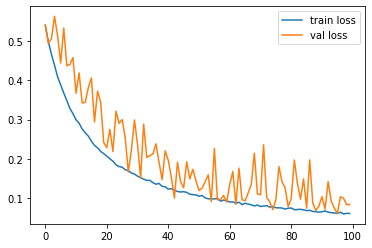

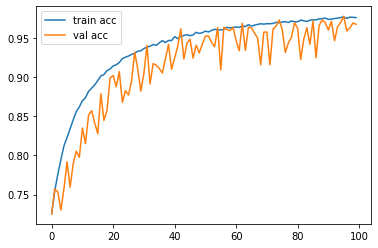

In [12]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [26]:
test_flow = image_gen1.flow_from_directory(
    base_path + 'test/',
    target_size = (224, 224),
    batch_size = 1,
    shuffle = False,
    class_mode ='binary'
)

Found 20000 images belonging to 2 classes.


In [27]:
y_pred = model.predict(test_flow)
y_test = test_flow.classes

In [28]:
from sklearn import metrics

In [29]:
print("ROC AUC Score:", metrics.roc_auc_score(y_test, y_pred))
print("AP Score:", metrics.average_precision_score(y_test, y_pred))
print()
print(metrics.classification_report(y_test, y_pred > 0.5))

ROC AUC Score: 0.99843864
AP Score: 0.9984253126993125

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10000
           1       0.99      0.94      0.97     10000

    accuracy                           0.97     20000
   macro avg       0.97      0.97      0.97     20000
weighted avg       0.97      0.97      0.97     20000



In [30]:
y_test

array([0, 0, 0, ..., 1, 1, 1])

In [31]:
y_test1 = np.array(y_test)
y_test1

array([0, 0, 0, ..., 1, 1, 1])

In [32]:
y_pred

array([[3.0904166e-06],
       [1.1434428e-07],
       [5.4451216e-02],
       ...,
       [8.9957589e-01],
       [9.9395627e-01],
       [9.9993587e-01]], dtype=float32)

In [33]:
y_pred1 = y_pred.copy()
np.where(y_pred1 > 0.5, 1, 0)

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [34]:
y_pred2 = y_pred1.flatten()
y_pred2 = np.where(y_pred2 > 0.5, 1, 0)
y_pred2

array([0, 0, 0, ..., 1, 1, 1])

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred2)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[9951   49]
 [ 606 9394]]
acc: 0.9673
sensitivity: 0.9951
specificity: 0.9394


In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred2)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[9951   49]
 [ 606 9394]]
acc: 0.9673
sensitivity: 0.9951
specificity: 0.9394


<AxesSubplot:>

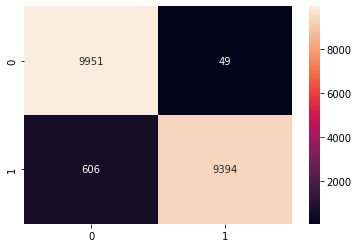

In [37]:
import seaborn as sns
sns.heatmap(cm,annot=True, fmt='g')